In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd output

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [4]:
objid = 2
worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)
os.chdir("..")
tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=True)
os.chdir(DATA_DIR)

Best worker's PR against BBG:  0.977930266743 1.0
Number of non-overlapping tile regions (M) :  1377
Number of workers (N) :  36
all unvoted tiles: [  1   6   9  11  12  13  15  16  17  18  19  21  23  24  25  26  27  28
  29  31  34  35  36  39  40  41  43  44  46  48  49  57  62  70  71  73
  85  86  87  92 106 148 153]
all unvoted workers: []
Object  2
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False


even iterating combination anything above list size> 20 is very large, lets use a small subset of large tiles or random tiles

In [5]:
import itertools

tile_subset_idx = np.random.choice(np.arange(len(tiles)),20)
combs = []

for i in tqdm(range(1, len(tile_subset_idx)+1)):
    els = [list(x) for x in itertools.combinations(tile_subset_idx, i)]
    combs.extend(els)

In [94]:
Tprime = combs[300]
p,r =compute_PR(objid,Tprime,tiles)

In [97]:
region_votes=[]
for tidx in Tprime:
    #Number of votes for that tile
    region_votes.append(np.sum(indicatorMat[:-1][:,tidx]))

In [147]:
gvals=[]
gammas = pkl.load(open("gfile{}.pkl".format(objid),'r'))
experiment_idx=0
if gammas!=[]:
    for tidx in Tprime:
        gvals.append(gammas[experiment_idx][tidx])
else:
    gvals.append(0)

In [151]:
[Tprime,np.sum(region_votes), np.mean(region_votes),np.mean(gvals),p,r]

[[120, 828, 1268],
 52,
 17.333333333333332,
 0.49931130356540648,
 0.05631013016412744,
 1.8328260058672894e-05]

In [23]:
rand_subset = np.random.choice(combs,30000)

In [34]:
training_tbl = []
for Tprime in tqdm(rand_subset):
    p,r =compute_PR(objid,Tprime,tiles)
    gvals=[]
    gammas = pkl.load(open("gfile{}.pkl".format(objid),'r'))
    experiment_idx=0
    # Majority Votes 
    region_votes=[]
    Tareas=[]
    for tidx in Tprime:
        #Number of votes for that tile
        region_votes.append(np.sum(indicatorMat[:-1][:,tidx]))
        
        if gammas!=[]:
            gvals.append(gammas[experiment_idx][tidx])
        else:
            gvals.append(0)
        
        Tareas.append(Polygon(tiles[tidx]).area)
    training_tbl.append([Tprime,np.sum(region_votes), np.mean(region_votes),np.sum(gvals),np.mean(gvals),np.sum(Tareas),np.mean(Tareas),p,r])

In [35]:
import pandas as pd 

In [36]:
df = pd.DataFrame(training_tbl,columns=["T prime","Total Votes","Average Votes","Total gamma value","Average gamma value",\
                                        "Total area","Average area","Precision","Recall"])

In [55]:
df = df[df["Total gamma value"]!=0]

In [56]:
df

,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
0,"[1217, 309, 668, 290, 402, 453, 282, 923, 284,...",176,12.571429,6.491183,0.463656,0.28,0.020000,0.273469,0.000013
1,"[1217, 668, 1004, 453, 284, 1120, 557, 37]",112,14.000000,3.495316,0.436914,2.36,0.295000,0.011259,0.000005
2,"[309, 668, 290, 453, 282, 1120, 743, 557, 249,...",86,8.600000,4.493938,0.449394,2.20,0.220000,0.013636,0.000005
3,"[309, 1004, 453, 521, 282, 923, 284, 720, 1120...",141,12.818182,4.993250,0.453932,0.42,0.038182,0.134694,0.000010
4,"[683, 668, 290, 402, 1004, 923, 284, 720, 1120...",158,13.166667,5.991736,0.499311,0.44,0.036667,0.083117,0.000006
5,"[1004, 453, 521, 282, 923, 284, 720, 1120, 743...",149,13.545455,4.993250,0.453932,2.42,0.220000,0.031641,0.000013
6,"[309, 1004, 282, 923, 284, 986, 927, 249]",107,13.375000,3.994490,0.499311,0.36,0.045000,0.101587,0.000006
7,"[309, 683, 668, 290, 1004, 453, 282, 923, 720,...",148,12.333333,5.492561,0.457713,2.44,0.203333,0.016393,0.000007
8,"[1217, 668, 290, 453, 521, 284, 1120, 743, 986]",127,14.111111,3.994627,0.443847,0.18,0.020000,0.480952,0.000015
9,"[1217, 309, 290, 402, 453, 282, 284, 720, 986,...",93,9.300000,4.493938,0.449394,0.20,0.020000,0.282857,0.000010


#### Go through several objects to create training set 

In [60]:
cd TileEM/output/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [65]:
training_tbl = []

for objid in tqdm(object_lst):
    #Get Tile information for that object
    worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
    os.chdir("..")
    tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=False)
    os.chdir(DATA_DIR)
    # Loop through all combinations of 20 randomly chosen tiles 
    tile_subset_idx = np.random.choice(np.arange(len(tiles)),20)
    combs = []
    for i in range(1, len(tile_subset_idx)+1):
        els = [list(x) for x in itertools.combinations(tile_subset_idx, i)]
        combs.extend(els)
    # Compute metric values for 10000 of these tile combinations
    rand_subset = np.random.choice(combs,5000)
    for Tprime in rand_subset:
        p,r =compute_PR(objid,Tprime,tiles)
        gvals=[]
        gammas = pkl.load(open("gfile{}.pkl".format(objid),'r'))
        experiment_idx=0
        # Majority Votes 
        region_votes=[]
        Tareas=[]
        for tidx in Tprime:
            #Number of votes for that tile
            region_votes.append(np.sum(indicatorMat[:-1][:,tidx]))

            if gammas!=[]:
                gvals.append(gammas[experiment_idx][tidx])
            else:
                gvals.append(0)

            Tareas.append(Polygon(tiles[tidx]).area)
        training_tbl.append([objid,Tprime,np.sum(region_votes), np.mean(region_votes),np.sum(gvals),np.mean(gvals),np.sum(Tareas),np.mean(Tareas),p,r])

In [66]:
df = pd.DataFrame(training_tbl,columns=["objid","T prime","Total Votes","Average Votes","Total gamma value","Average gamma value",\
                                        "Total area","Average area","Precision","Recall"])
df = df[df["Total gamma value"]!=0]

this took about 1.5 hours to run 

In [70]:
df.to_csv("random_tile_combo_metric.csv")

# Correlation between variables

In [71]:
correlation = df.corr('pearson')
correlation

,objid,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
objid,1.000000,-0.022705,-0.034993,0.042947,0.098038,0.073253,0.070726,0.072818,0.029553
Total Votes,-0.022705,1.000000,0.721875,0.661389,0.118414,-0.069674,-0.101328,0.145803,0.065967
Average Votes,-0.034993,0.721875,1.000000,0.053582,0.170232,-0.137034,-0.138107,0.270454,-0.026460
Total gamma value,0.042947,0.661389,0.053582,1.000000,0.358486,-0.070691,-0.115897,-0.034585,0.066596
Average gamma value,0.098038,0.118414,0.170232,0.358486,1.000000,-0.318151,-0.320050,0.068233,-0.172714
Total area,0.073253,-0.069674,-0.137034,-0.070691,-0.318151,1.000000,0.968613,-0.249571,0.273581
Average area,0.070726,-0.101328,-0.138107,-0.115897,-0.320050,0.968613,1.000000,-0.241724,0.243449
Precision,0.072818,0.145803,0.270454,-0.034585,0.068233,-0.249571,-0.241724,1.000000,0.266930
Recall,0.029553,0.065967,-0.026460,0.066596,-0.172714,0.273581,0.243449,0.266930,1.000000


<matplotlib.colorbar.Colorbar instance at 0x121826bd8>

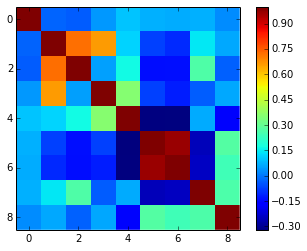

In [72]:
plt.imshow(correlation.as_matrix(),interpolation="None")
plt.colorbar()

- the obvious things are that:
    - average and sum are correlated
    - identity along diagonal is correlated
- surprisingly, area is only weakly correlated with recall
- Total votes and total gamma values are strongly correlated as we expected
- Both total votes and total gamma values are strongly correlated with recall value

# Regression for ground truth PR

In [73]:
x_attr = ["Average Votes","Average gamma value","Average area"]
y_attr = ["Precision","Recall"]

In [77]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


In [96]:
msk = np.random.rand(len(df)) < 0.8
Xtrain = df[x_attr][msk].as_matrix()
Xtest = df[x_attr][~msk].as_matrix()
Ytrain = df[y_attr][msk].as_matrix()
Ytest = df[y_attr][~msk].as_matrix()

In [97]:
regr.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(Xtest) - Ytest) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(Xtest, Ytest))

('Coefficients: \n', array([[  2.01187036e-02,  -2.93283503e-01,  -2.92245721e-03],
       [  4.00797571e-06,  -1.59248011e-03,   6.04425847e-06]]))
Mean squared error: 0.04
Variance score: 0.12


In [100]:
X = df[x_attr].as_matrix()
Y = df[y_attr].as_matrix()

In [101]:
regr.fit(X,Y)
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([[  2.00258426e-02,  -2.96615134e-01,  -2.88448765e-03],
       [  3.85888918e-06,  -1.60882720e-03,   6.17068862e-06]]))


#### $\therefore$ Average gamma value more important in determining actual PR compared to average area or average votes of the selected tiles 

In [105]:
combined_df = df["Precision"]+df["Recall"]

In [110]:
df.sort(columns=["Precision","Recall"],ascending=False)

,objid,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
34619,7,"[606, 415, 894, 1115, 1089]",104,20.800000,1.999197,0.399839,6.70,1.340000,1,0.001536
223173,45,"[485, 135, 559, 487, 629, 419, 658, 655, 310, ...",198,19.800000,5.493645,0.549364,5.00,0.500000,1,0.001068
222332,45,"[485, 135, 559, 487, 629, 419, 658, 655, 310, ...",184,18.400000,5.493645,0.549364,4.80,0.480000,1,0.001025
223182,45,"[485, 135, 559, 487, 629, 419, 658, 658, 397, ...",209,20.900000,5.493645,0.549364,5.80,0.580000,1,0.001021
23426,5,"[834, 514, 1036, 1376, 603, 1295, 1272, 197, 6...",211,21.100000,5.492904,0.549290,3.80,0.380000,1,0.000973
23662,5,"[834, 514, 1000, 1036, 1376, 603, 1295, 1272, ...",237,23.700000,5.492904,0.549290,3.80,0.380000,1,0.000973
21574,5,"[834, 1000, 1036, 456, 1376, 603, 1295, 1272, ...",220,24.444444,4.993581,0.554842,3.78,0.420000,1,0.000968
20243,5,"[1036, 1376, 1295, 1272, 520]",145,29.000000,2.996291,0.599258,3.70,0.740000,1,0.000947
222735,45,"[135, 559, 487, 629, 658, 557, 655, 397]",166,20.750000,4.495020,0.561877,4.36,0.545000,1,0.000931
20850,5,"[834, 514, 1000, 1036, 1376, 603, 1295, 520]",190,23.750000,4.494259,0.561782,3.56,0.445000,1,0.000911


In [111]:
df.sort(columns=["Recall","Precision"],ascending=False)

,objid,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
109499,22,"[314, 251, 425, 413, 363]",132,26.400000,2.495951,0.499190,3.70,0.740000,0.989189,0.00307
109548,22,"[150, 314, 101, 263, 95, 425, 144, 413, 363]",150,16.666667,4.492712,0.499190,3.98,0.442222,0.919598,0.00307
105863,22,"[150, 263, 276, 251, 425, 144, 413, 363]",152,19.000000,3.993522,0.499190,4.16,0.520000,0.879808,0.00307
105642,22,"[314, 76, 48, 425, 413, 363, 110]",123,17.571429,3.494332,0.499190,4.34,0.620000,0.843318,0.00307
109925,22,"[150, 263, 276, 251, 425, 168, 413, 363]",156,19.500000,3.993522,0.499190,4.56,0.570000,0.802632,0.00307
106211,22,"[314, 287, 101, 263, 95, 425, 168, 413, 363]",167,18.555556,4.492712,0.499190,4.58,0.508889,0.799127,0.00307
105218,22,"[150, 287, 101, 263, 276, 425, 144, 413, 363, ...",163,16.300000,4.991903,0.499190,4.60,0.460000,0.795652,0.00307
107693,22,"[150, 314, 76, 287, 101, 263, 95, 276, 425, 14...",187,15.583333,5.990283,0.499190,4.64,0.386667,0.788793,0.00307
105740,22,"[76, 251, 425, 144, 413, 363, 32]",118,16.857143,2.995059,0.427866,4.74,0.677143,0.772152,0.00307
109045,22,"[314, 76, 287, 48, 425, 413, 363]",138,19.714286,3.494332,0.499190,4.74,0.677143,0.772152,0.00307


In [112]:
max(df["Recall"])

0.0030704697986576744